Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import isodate
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Step 2: Load Dataset


In [2]:
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")

Step 3: Basic information


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [6]:
df.isnull().sum()

,0
ID,0
Video Duration,0
Video Publish Time,0
Days Since Publish,0
Day,0
...,...
Watch Time (hours),0
Subscribers,0
Estimated Revenue (USD),0
Impressions,0


In [7]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


Step 3: Data cleaning

In [9]:
# To change video publish time to datetime format
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])
df = df.dropna()

Step 4: Exploratory Data Analysis

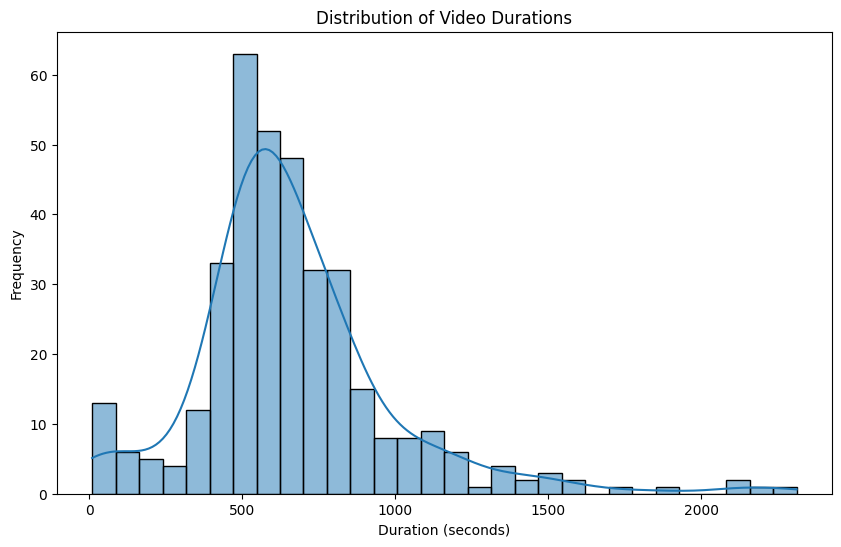

In [11]:
# Distribution of Video Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Video Duration'], bins=30, kde=True)
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()



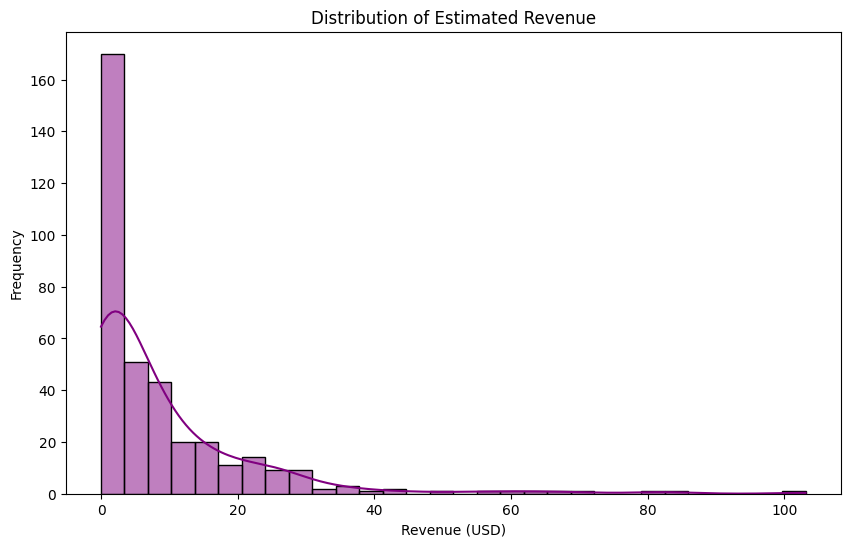

In [14]:
# Distribution of Estimated Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Revenue (USD)'], bins=30, kde=True, color='purple')
plt.title('Distribution of Estimated Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

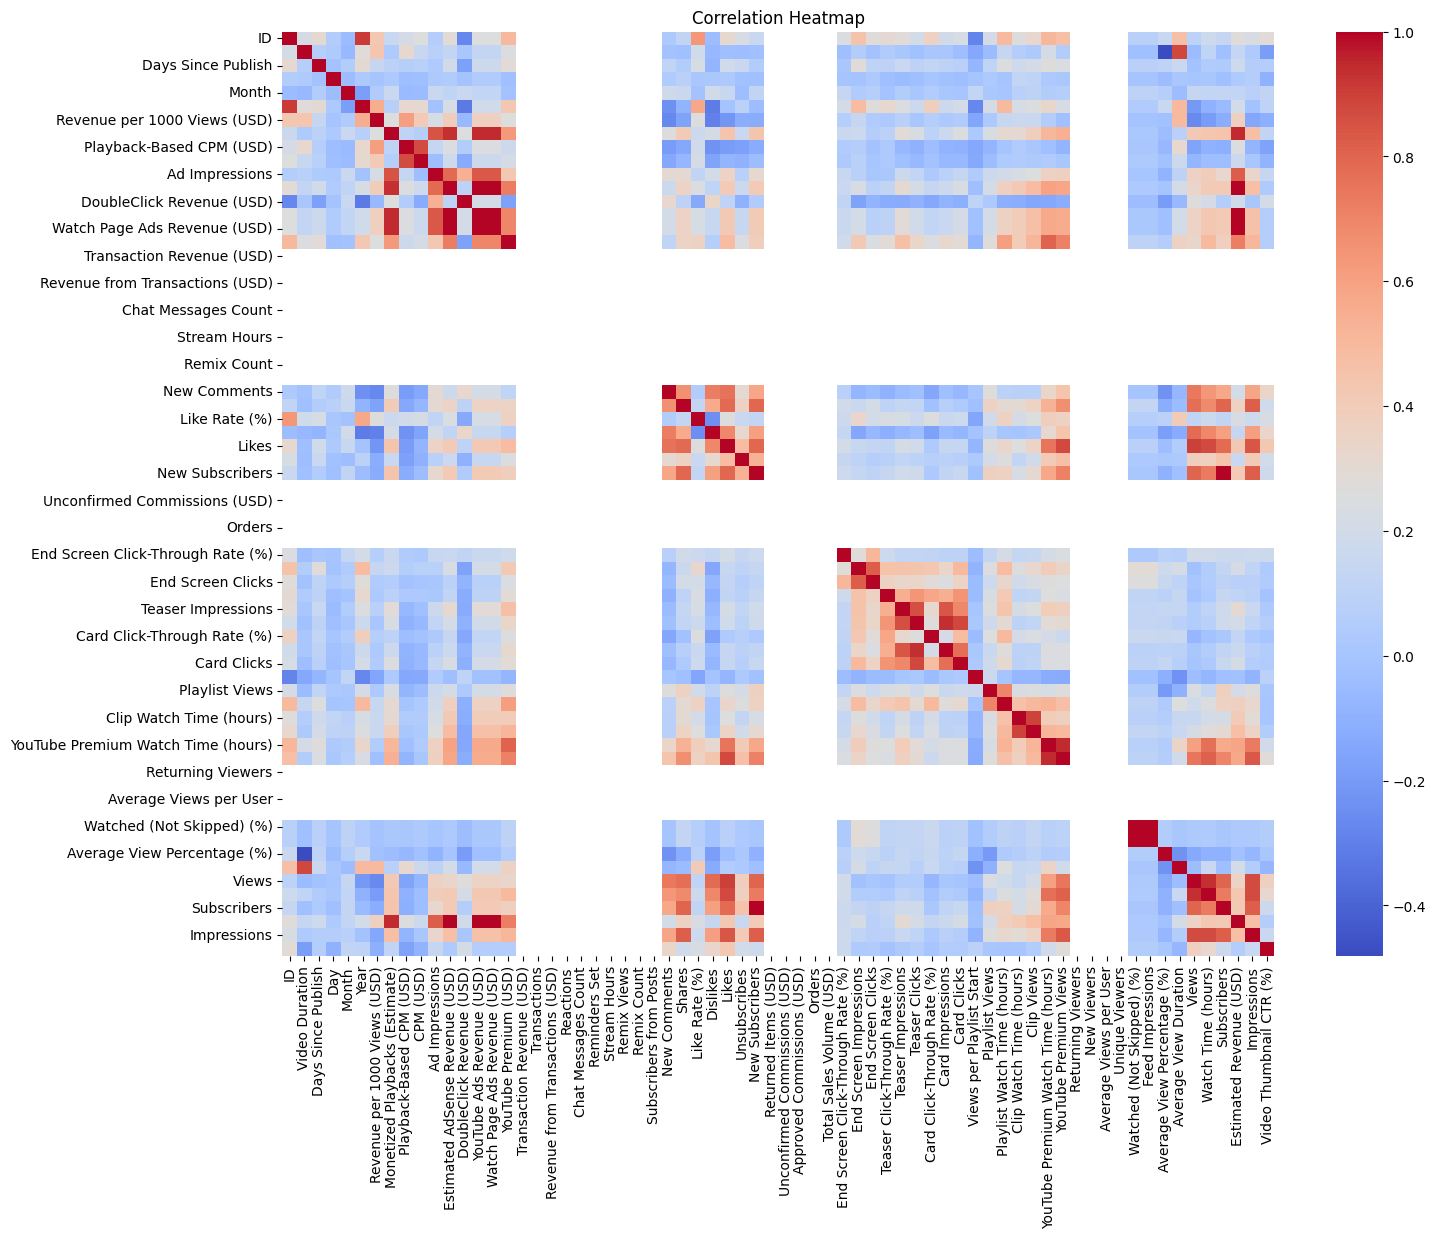

In [15]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

Step 5: Feature Engineering

In [25]:
# Revenue per View
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views']
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%),Revenue per View,Engagement Rate
0,0,201.0,2016-06-02,0,2,6,2016,Thursday,0.024,723.0,...,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66,0.000024,4.364455
1,1,391.0,2016-06-10,8,10,6,2016,Friday,0.056,727.0,...,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85,0.000056,3.153860
2,2,133.0,2016-06-14,4,14,6,2016,Tuesday,0.014,76.0,...,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07,0.000014,3.949293
3,3,14.0,2016-06-29,15,29,6,2016,Wednesday,0.004,18.0,...,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60,0.000004,5.434288
4,4,45.0,2016-07-01,2,1,7,2016,Friday,0.000,0.0,...,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62,0.000000,4.495532


In [26]:
# Engagement Rate
df['Engagement Rate'] = (df['Likes'] + df['Shares'] + df['New Comments']) / df['Views'] * 100
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%),Revenue per View,Engagement Rate
0,0,201.0,2016-06-02,0,2,6,2016,Thursday,0.024,723.0,...,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66,0.000024,4.364455
1,1,391.0,2016-06-10,8,10,6,2016,Friday,0.056,727.0,...,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85,0.000056,3.153860
2,2,133.0,2016-06-14,4,14,6,2016,Tuesday,0.014,76.0,...,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07,0.000014,3.949293
3,3,14.0,2016-06-29,15,29,6,2016,Wednesday,0.004,18.0,...,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60,0.000004,5.434288
4,4,45.0,2016-07-01,2,1,7,2016,Friday,0.000,0.0,...,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62,0.000000,4.495532


Step 6: Visualization

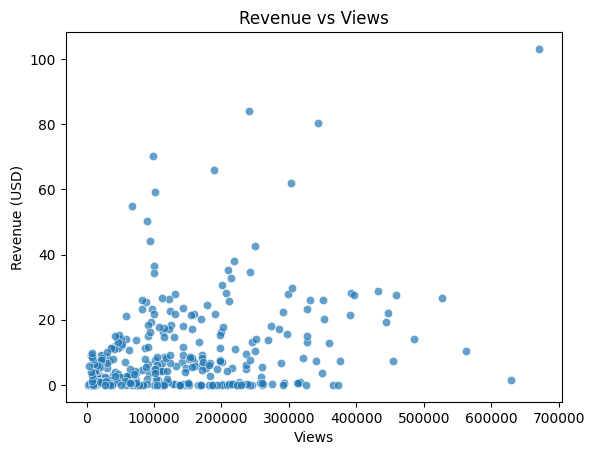

In [29]:
# Revenue vs Views
sns.scatterplot(x=df['Views'], y=df['Estimated Revenue (USD)'], alpha=0.7)
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Revenue (USD)")
plt.show()

In [31]:
#Top 10 Revenue Videos
top_videos = df.sort_values(by='Estimated Revenue (USD)', ascending=False).head(15)
print(top_videos[['ID', 'Estimated Revenue (USD)', 'Views', 'Subscribers']])

      ID  Estimated Revenue (USD)     Views  Subscribers
228  228                  103.117  670990.0       3538.0
257  257                   83.979  241060.0       1125.0
251  251                   80.265  343319.0       1437.0
289  289                   70.247   99196.0        350.0
278  278                   65.978  188324.0       1824.0
260  260                   62.047  302999.0        866.0
293  293                   59.058  101025.0        602.0
294  294                   55.040   67556.0        581.0
290  290                   50.344   89284.0        995.0
284  284                   44.228   93487.0        305.0
248  248                   42.518  249471.0        527.0
266  266                   38.001  218899.0       1073.0
286  286                   36.533   99292.0        395.0
255  255                   35.200  209530.0        431.0
130  130                   34.607  242331.0        293.0


Step 7:Prdictive modeling

In [32]:
# Define features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'

X = df[features]
y = df[target]


In [33]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [36]:
# Predictions
y_pred = model.predict(X_test)

In [38]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 75.70
R-squared: 0.13


Step 8: Insights

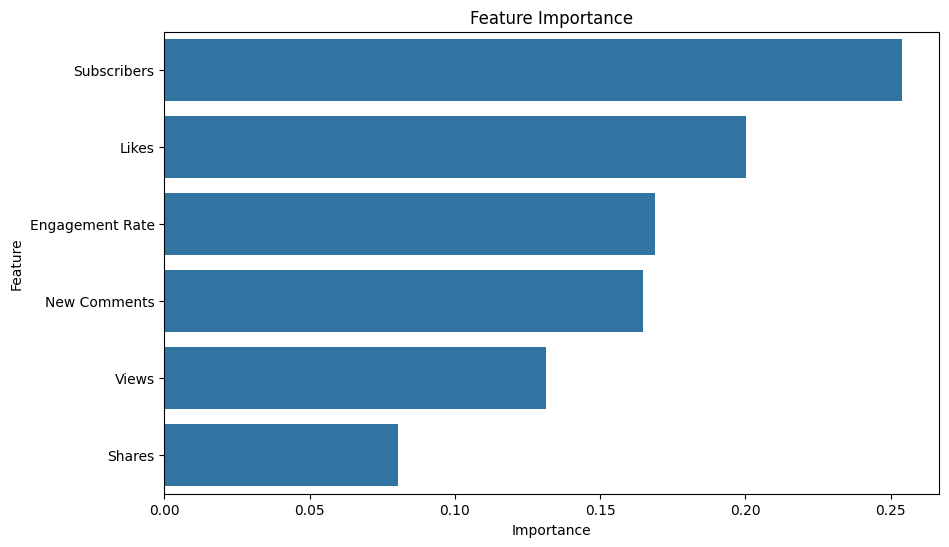

In [39]:
# Feature Importance
importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance")
plt.show()

In [40]:
import joblib
joblib.dump(model, 'youtube_revenue_predictor.pkl')

['youtube_revenue_predictor.pkl']

To Export Clean Dataset for Dashboard

In [41]:
df['youtube_channel_real_performance_analytics.csv'] = target
df.to_csv('cleaned_youtube_channel_real_performance_analytics.csv', index=False)